In [2]:
import numpy as np
import matplotlib.pyplot as plt
import qutip

Two fixed frequency qubit coupled via tunable coupler ($w_{q1}-w_{q2}=constant$)
(All qubit are assumed as a perfect two level system)
$$H(t)=H_0+H_{int}(t)+H_{d1}(t)+H_{d2}(t)$$
$$H_0=-\frac{\omega_{q1}}{2}\sigma_{z 1}-\frac{\omega_{q2}}{2}\sigma_{z 2}$$
$$H_{int}(t)=g(t)\sigma_{y1}\sigma_{y2}$$
$$H_{d1}(t)=\Omega_1V_{d1}(t)\sigma_{y1}$$

$$U_{rf}(t)=e^{iH_0t}$$ 
interaction picture

$$\tilde{H}(t)=U_{rf}(t)H_{int}(t)U_{rf}^{\dagger}(t)=g(t) \Big[ \cos(\omega_{q1}t)\sigma_{y1}-\sin(\omega_{q1}t)  \sigma_{x1} \Big] \Big[ \cos(\omega_{q2}t)\sigma_{y2}-\sin(\omega_{q2}t)  \sigma_{x2} \Big]$$

RWA
$$\tilde{H}(t)=g(t) \Big[ e^{i\delta\omega_{12}t}\sigma_1^+ \sigma_2^- + e^{-i\delta\omega_{12}t} \sigma_1^- \sigma_2^+ \Big]$$

$$\tilde{H}(t)=g(t) 
\begin{bmatrix}
0 & 0 & 0 & 0\\
0 & 0 & e^{-i\delta \omega_{12}t} & 0 \\
0 & e^{i\delta \omega_{12}t} & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}

-\frac{\Omega_1}{2}V_1S_1(t)
\begin{bmatrix}
0 & 0 & e^{i(\delta \omega_{1d}t + \phi_1)} & 0\\
0 & 0 & 0 & e^{i(\delta \omega_{1d}t + \phi_1)} \\
e^{-i(\delta \omega_{1d}t + \phi_1)} & 0 & 0 & 0 \\
0 & e^{-i(\delta \omega_{1d}t + \phi_1)} & 0 & 0
\end{bmatrix}

-\frac{\Omega_2}{2}V_2S_2(t)
\begin{bmatrix}
0 & e^{i(\delta \omega_{2d}t + \phi_2)}& 0 & 0\\
e^{-i(\delta \omega_{2d}t + \phi_2)} & 0 & 0 & 0 \\
0 & 0 & 0 & e^{i(\delta \omega_{2d}t + \phi_2)}\\
0 & 0 & e^{-i(\delta \omega_{2d}t + \phi_2)} & 0
\end{bmatrix}$$


# Setting

### Rabi oscillation frequency $\Omega$

$\Omega_1/(2\pi)=0.01$(10MHz)
$\Omega_2/(2\pi)=0.01$(10MHz)

### Qubit frequency difference $\delta \omega_{12}$
얘네가 문제임 Z line으로 control 가능하게 해야 realistic 한데

### Detuning $\delta \omega_{1}$, $\delta \omega_{2}$
$\delta \omega=\omega_q -\omega_d$


### g
$g/(2\pi)$=

### Anharmonicty $\eta$
$\eta/(2\pi)=0$ 아직 추가안함





In [3]:
def make_U(H, time_step):
    """
    PARAMETER
        Hamiltonian : function of t
        time_step : float
    RETURNS
        U : function of t
    """
    hbar = 1.
    I = np.identity(4,dtype="complex128")
    
    def U(t):
        total = I #U(t=0)
        check = [I]
        times = np.arange(start=0,stop=t,step=time_step)
        for time in times:
            derivative = (-1j/hbar)*np.matmul(H(time),total)*time_step
            total = total + derivative
            check.append(total) 
        return total, np.array(check)
    return U

In [4]:
def make_H_int(g,delta_omega):
    """
    
    :param g: coupling strength
    :param detuning: omega_q1 - omega_q2
    :return: 
    """
    def H_int(t):
        matrix=np.zeros((4,4),dtype="complex128")
        matrix[2][1] = np.exp((1j)*delta_omega*t)
        matrix[1][2] = np.exp((-1j)*delta_omega*t)
        return g(t)*matrix
    return H_int

In [5]:
def make_H_d(Omega,V_0,delta_omega,phi,s):
    """
    :param Omega:  
    :param V_0: 
    :param delta_omega:omega_q - omega_d 
    :param phi: offset in driving sine wave
    :param s: control pulse
    :return: 
    """
    
    def H(t):
        matrix=np.zeros((4,4),dtype='complex128')
        matrix[0][1]=np.exp((1j)*(delta_omega*t+phi))
        matrix[1][0]=np.exp((-1j)*(delta_omega*t+phi))
    
        return (-0.5)*Omega*V_0*s(t)*matrix
    
    return H

In [6]:
def g(t):
    return 0.04*2*np.pi 
# 40MHz

In [10]:
def s(t):
    return 1

In [13]:
#Setting
omega1 = 0.01 * 2 * np.pi #10MHz
omega2 = 0.01 * 2 * np.pi #10MHz
V1=1.
V2=1. #unit?
delta_omega1 = 0.001 * 2 * np.pi #1MHz #qubit frequency and driving frequency
delta_omega2 = 0.001 * 2 * np.pi #1MHz
delta_q12 = 1 * 2 * np.pi # 1GHz
phi1 = 0.001
phi2 = 0.001

In [17]:
H_int = make_H_int(g=g,delta_omega=delta_omega2) 
H_d1 = make_H_d(Omega=omega1, V_0=V1,delta_omega=delta_omega1,s=s,phi=phi1)
H_d2 = make_H_d(Omega=omega2, V_0=V2,delta_omega=delta_omega2,s=s,phi=phi2)
def H(t):
    return H_int(t)+H_d1(t)+H_d2(t)

In [19]:
U = make_U(H, time_step=1e-4)

In [20]:
transition, info = U(10.)

ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

In [171]:
unitary_check=np.matmul(np.matrix.getH(transition),transition)

In [172]:
#prepare qubit 1 in e 
initial_state = np.array([0,0,1.,0,], dtype="complex128")

In [173]:
state_history=[]
for trans in info:
    tran_state=np.matmul(trans,initial_state)
    state_history.append(tran_state)
    

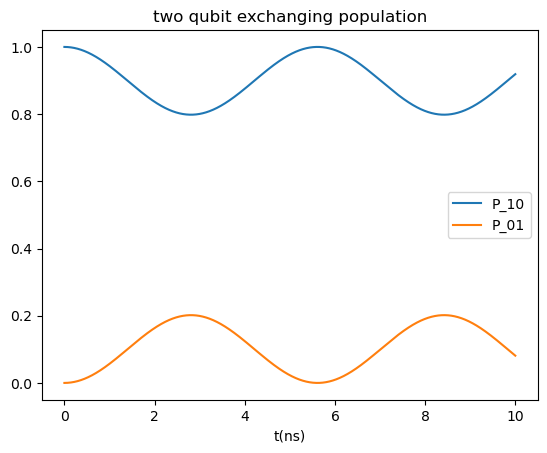

In [174]:
fig, ax = plt.subplots()
ax.set_title("two qubit exchanging population")
ax.plot(np.arange(start=0,stop=10.+1e-4,step=1e-4),[np.abs(s[2])**2 for s in state_history],label="P_10")
ax.plot(np.arange(start=0,stop=10.+1e-4,step=1e-4),[np.abs(s[1])**2 for s in state_history],label="P_01")
ax.set_xlabel("t(ns)")
plt.legend()
plt.show()

In [175]:
trans_state=np.matmul(transition,initial_state)